## Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
from scipy.stats import pearsonr, spearmanr, ttest_ind

#custom modules
import wrangle as w

#remove pink warning box
import warnings
warnings.filterwarnings('ignore')


#stats is great
from scipy import stats


In [2]:
# acquire, validate, & test
train,val,test=w.wrangle_zillow_split()


       train  ----> (1284141, 7)
    validate  ----> (428047, 7)
        test  ----> (428047, 7)


<h1>
<font color='green'>
Information from codeup manual material
</font>
</h1>

## Types of Visualizations

Here is a breakdown of visualization by type with some code useful snippets. 

Below, let's use the appropriate visualizations on our student grades dataset.

### 1. Univariate Distributions

* Check out the distributions of a single variable at a time using pandas built-in plotting function to create a historgram or Seaborn displot, boxplot, or countplot; this can be done before splitting our data if we want.

* Continuous variable distributions


                    df.[col].hist(grid=False, bins=10)

                    sns.displot(x, data)

                    sns.boxplot(data)

* Discrete variable distributions


                    sns.countplot(x='discrete_var', data)

###  2. Continuous with Continuous

* Seaborn pairplot to create a scatter matrix visualizing all continous variable relationships along with individiual distributions.


                    sns.pairplot(data)

* Seaborn relplot for a simple scatter plot of two continuous variables.


                    sns.relplot(x, y, data, kind=scatter)

* Seaborn lmplot for a simple scatter plot of two continous variables with a regression line. I can pass a discrete variable to col or hue to bring in another dimension, too.


                    sns.lmplot(x, y, data, scatter=True, hue=None, col=None)

* Seaborn jointplot for a simple scatter plot of two continuous variables with a regression line and the addition of a histogram for each variable.


                    sns.jointplot(x, y, data, kind=scatter)

* Seaborn heatmap of Correlation Coefficients for all numeric columns in a dataset.


                    sns.heatmap(train.corr())

### 3. Discrete with Continuous

* Seaborn swarmplot or stripplot to examine a discrete variable by a continuous.


                    sns.swarmplot(x='discrete_var', y='continuous_var', data=train)

                    sns.stripplot(x='discrete_var', y='continuous_var', data=train)

* Seaborn boxplot, violinplot, or barplot to show the distribution of a continuous variable by a discrete variable.


                    sns.boxplot(x='discrete_var', y='continuous_var', data=train)

                    sns.violinplot(x='discrete_var', y='continuous_var', data=train)

                    sns.barplot(x='discrete_var', y='continuous_var', data=train)

### 4. Discrete with Discrete

* Seaborn heatmap with a pandas crosstab to examine discrete variables with discrete.


                    ctab = pd.crosstab(index, columns, values)

                    sns.heatmap(ctab, annot=True)

<div class='alert alert-block alert-success'>

# Q1) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
</div>

In [3]:
train.sample(4)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
941104,3,2.0,1360,287386,1952,3184.16,LA
1166622,4,3.0,2201,673458,1940,7944.71,LA
277007,2,1.0,1420,289959,1922,3618.14,Orange
602945,2,1.0,576,174458,1927,2387.29,LA


In [4]:
def plot_variable_pairs(df):
    
    # reg = regression line (or best fitting line)
    sns.pairplot(df,
                 diag_kws={'color':'green'},
                 kind='reg',
                 plot_kws={'line_kws':{'color': 'red'}},
                 corner=True
                )
    
    plt.show()
    

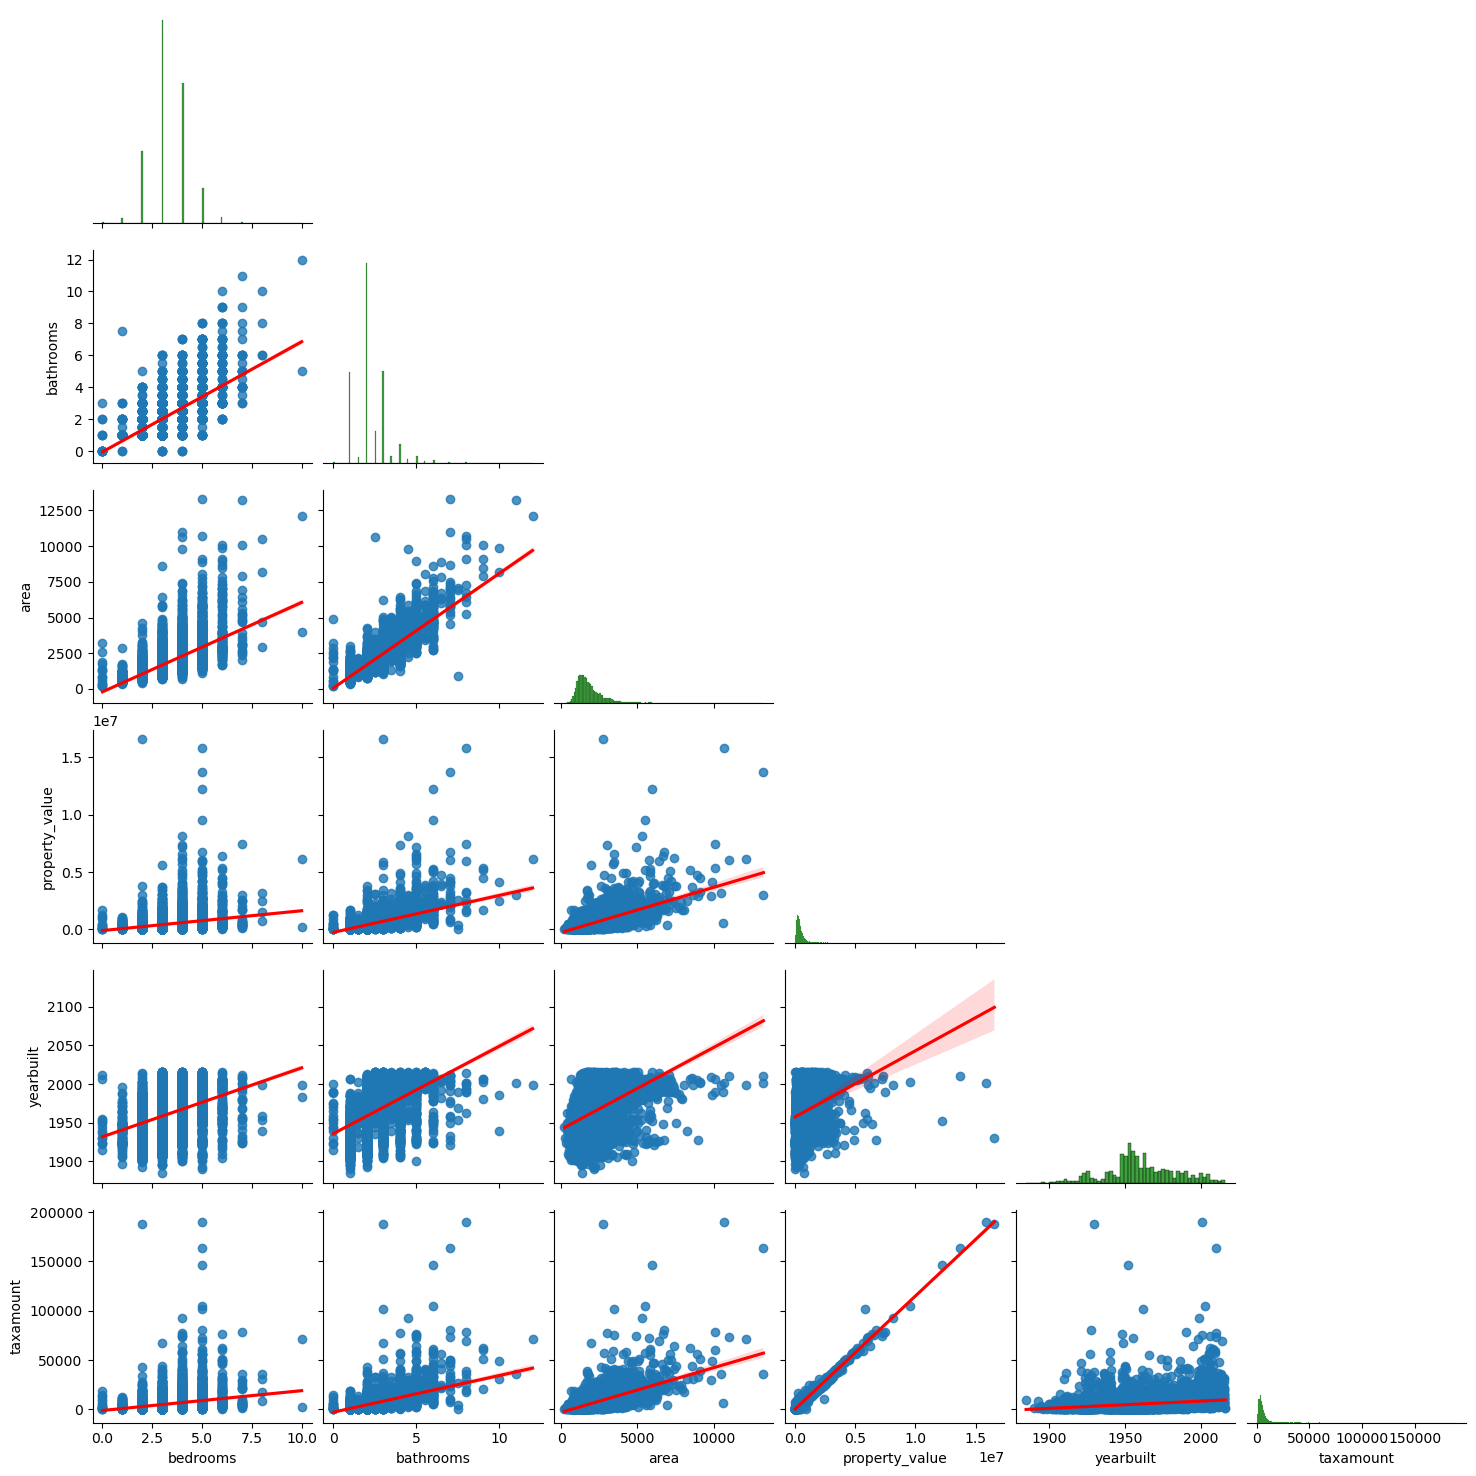

In [5]:
plot_variable_pairs(train.sample(10000))

<div class='alert alert-block alert-success'>

# Q2.Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
</div>

In [6]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA


In [7]:
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for how many unique values
        # if less than 100, append to cat_col
        if train[col].dtype== 'object':
            cat_col.append(col)
        else: 
            #if it has more than 100 unique values, append to continous column variable
            con_col.append(col)

In [8]:
cat_col

['county']

In [9]:
con_col

['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt', 'taxamount']

In [10]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    
    
    for i in categorical_var:
        
        for j in continuous_var:
        
            plt.figure(figsize=(15, 8))
            # Plotting boxplot
            plt.subplot(1, 4, 1)
            sns.boxplot(x=i, y=j, data=df)
            plt.title('Boxplot')

            # Plotting bar plot
            plt.subplot(1, 4, 2)
            sns.barplot(x=i, y=j, data=df)
            plt.title('bar Plot')

            # Plotting scatter plot (for smaller datasets)
            plt.subplot(1, 4, 3)
            sns.scatterplot(x=i, y=j, data=df)
            plt.title('scatter Plot')
            
            # Plotting swarm plot (for smaller datasets)
            plt.subplot(1, 4, 4)
            sns.swarmplot(x=i, y=j, data=df)
            plt.title('swarm Plot')
            
            # Plotting strip plot (for smaller datasets)
            # plt.subplot(2, 2, 5)
            # sns.stripplot(x=i, y=j, data=df)
            # plt.title('strip Plot')
            

            plt.tight_layout()
            plt.show()

<div class='alert alert-block alert-success'>

# Q3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
</div>

In [11]:
import explore as e

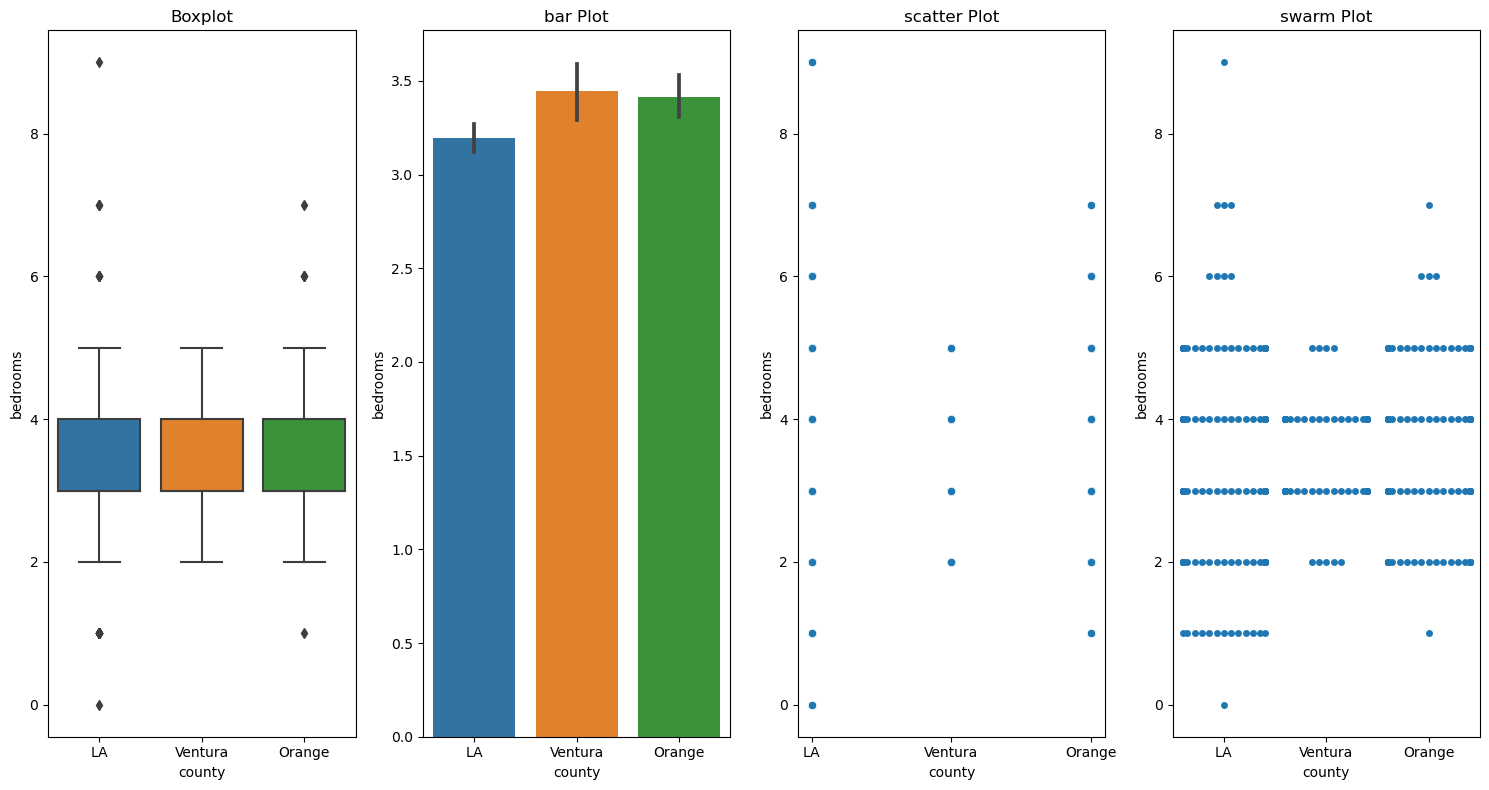

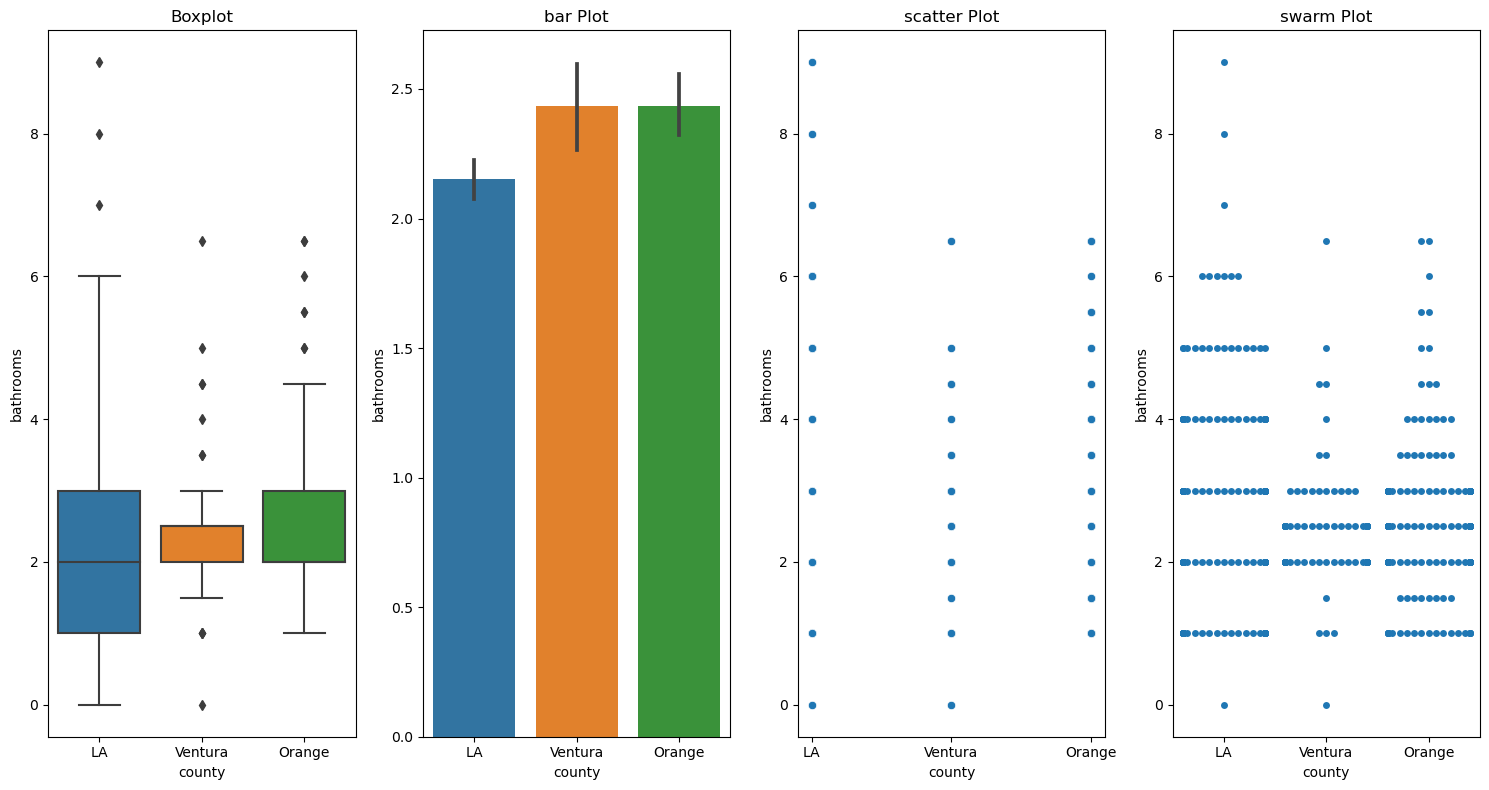

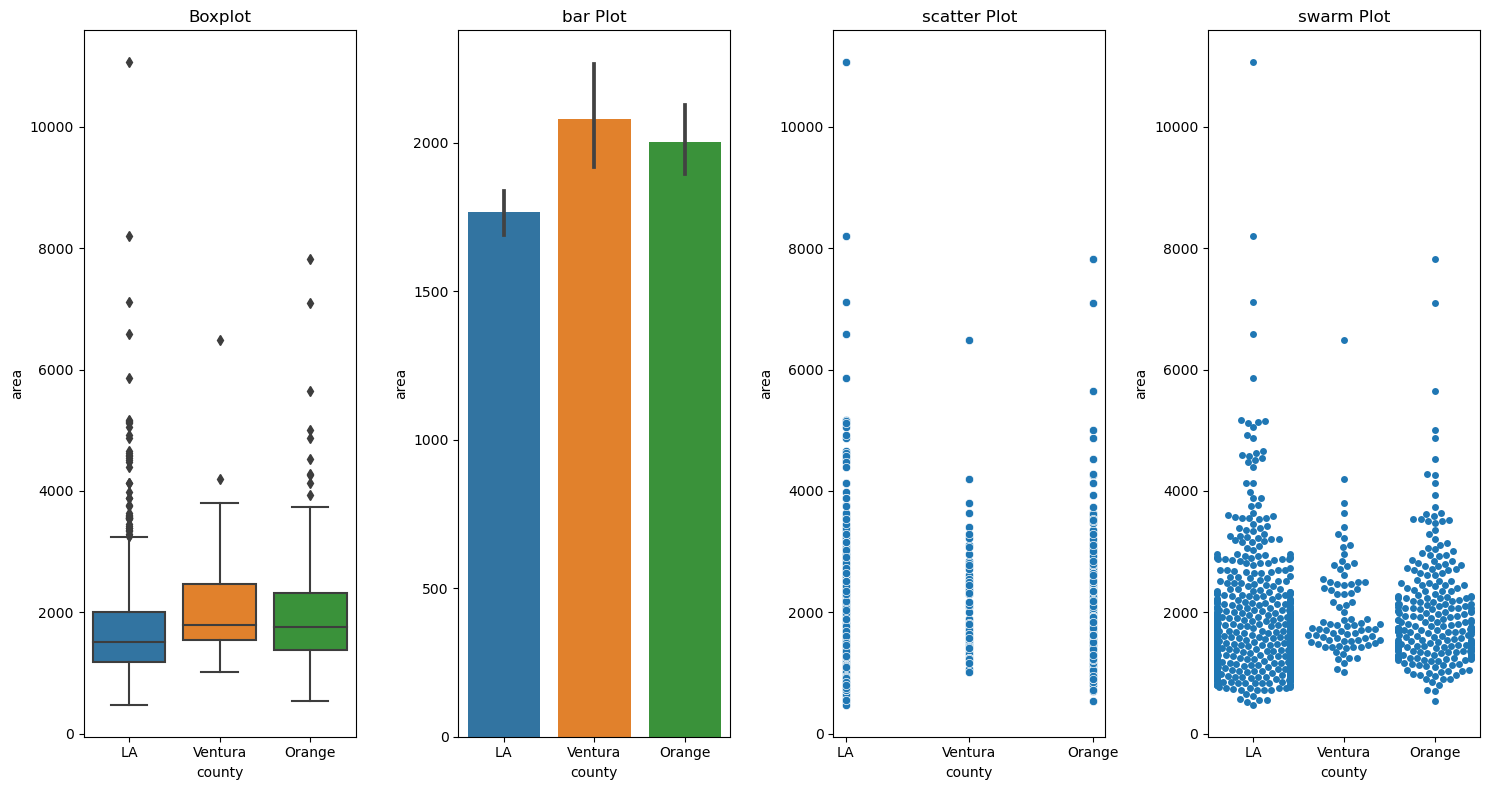

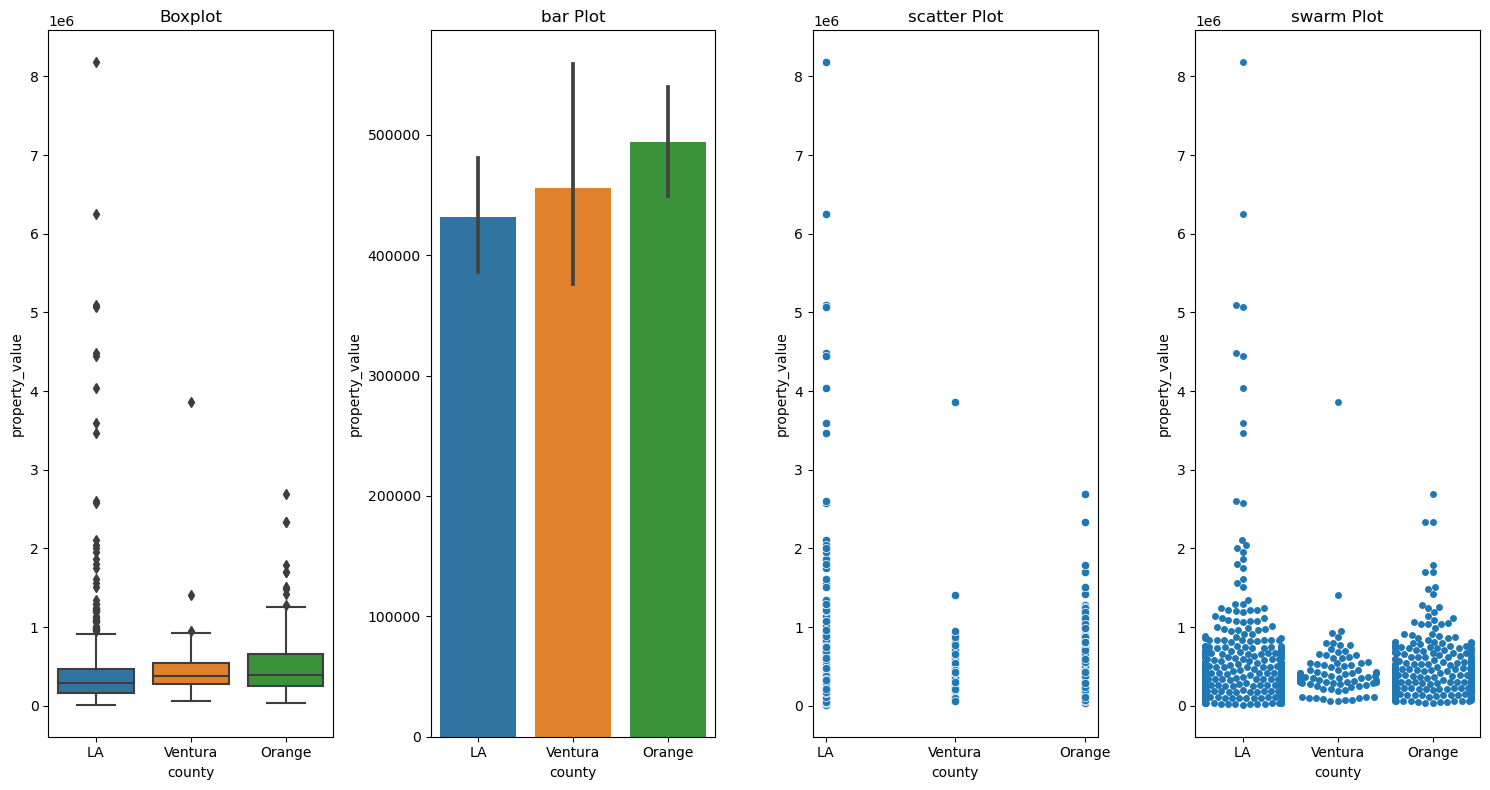

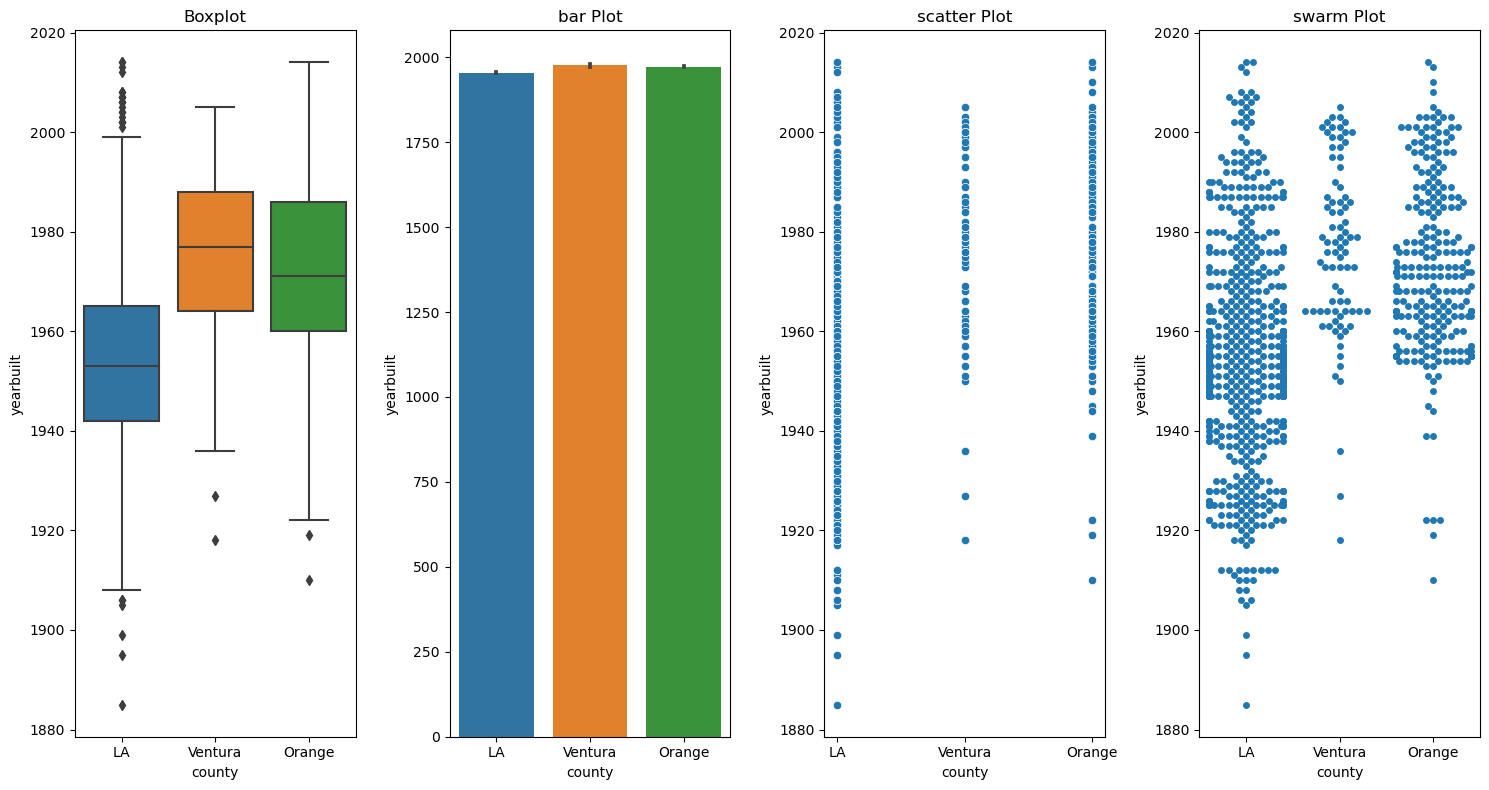

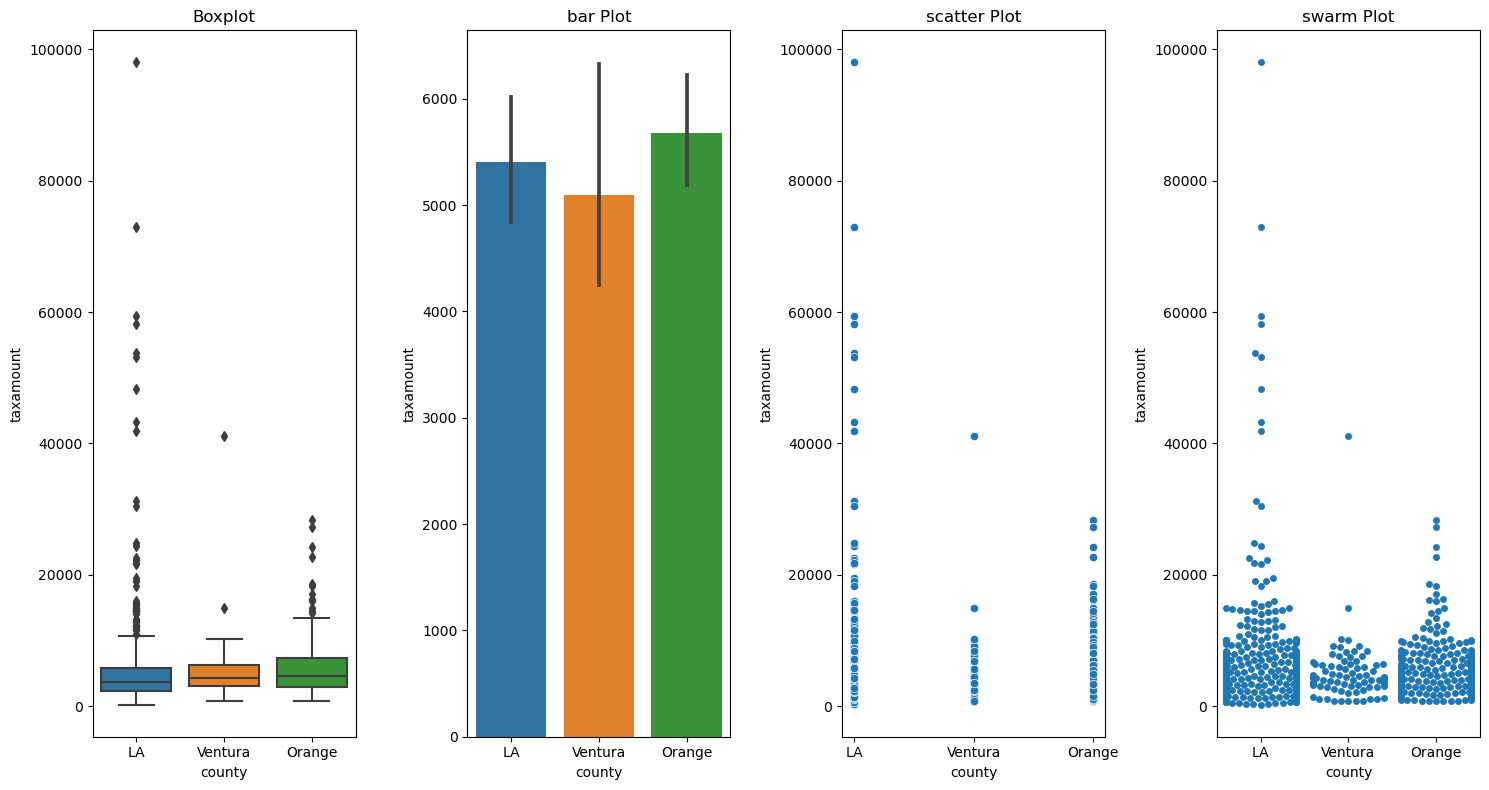

In [12]:
e.plot_categorical_and_continuous_vars(train.sample(1000),cat_col,con_col)

<div class='alert alert-block alert-success'>

# 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.
</div>

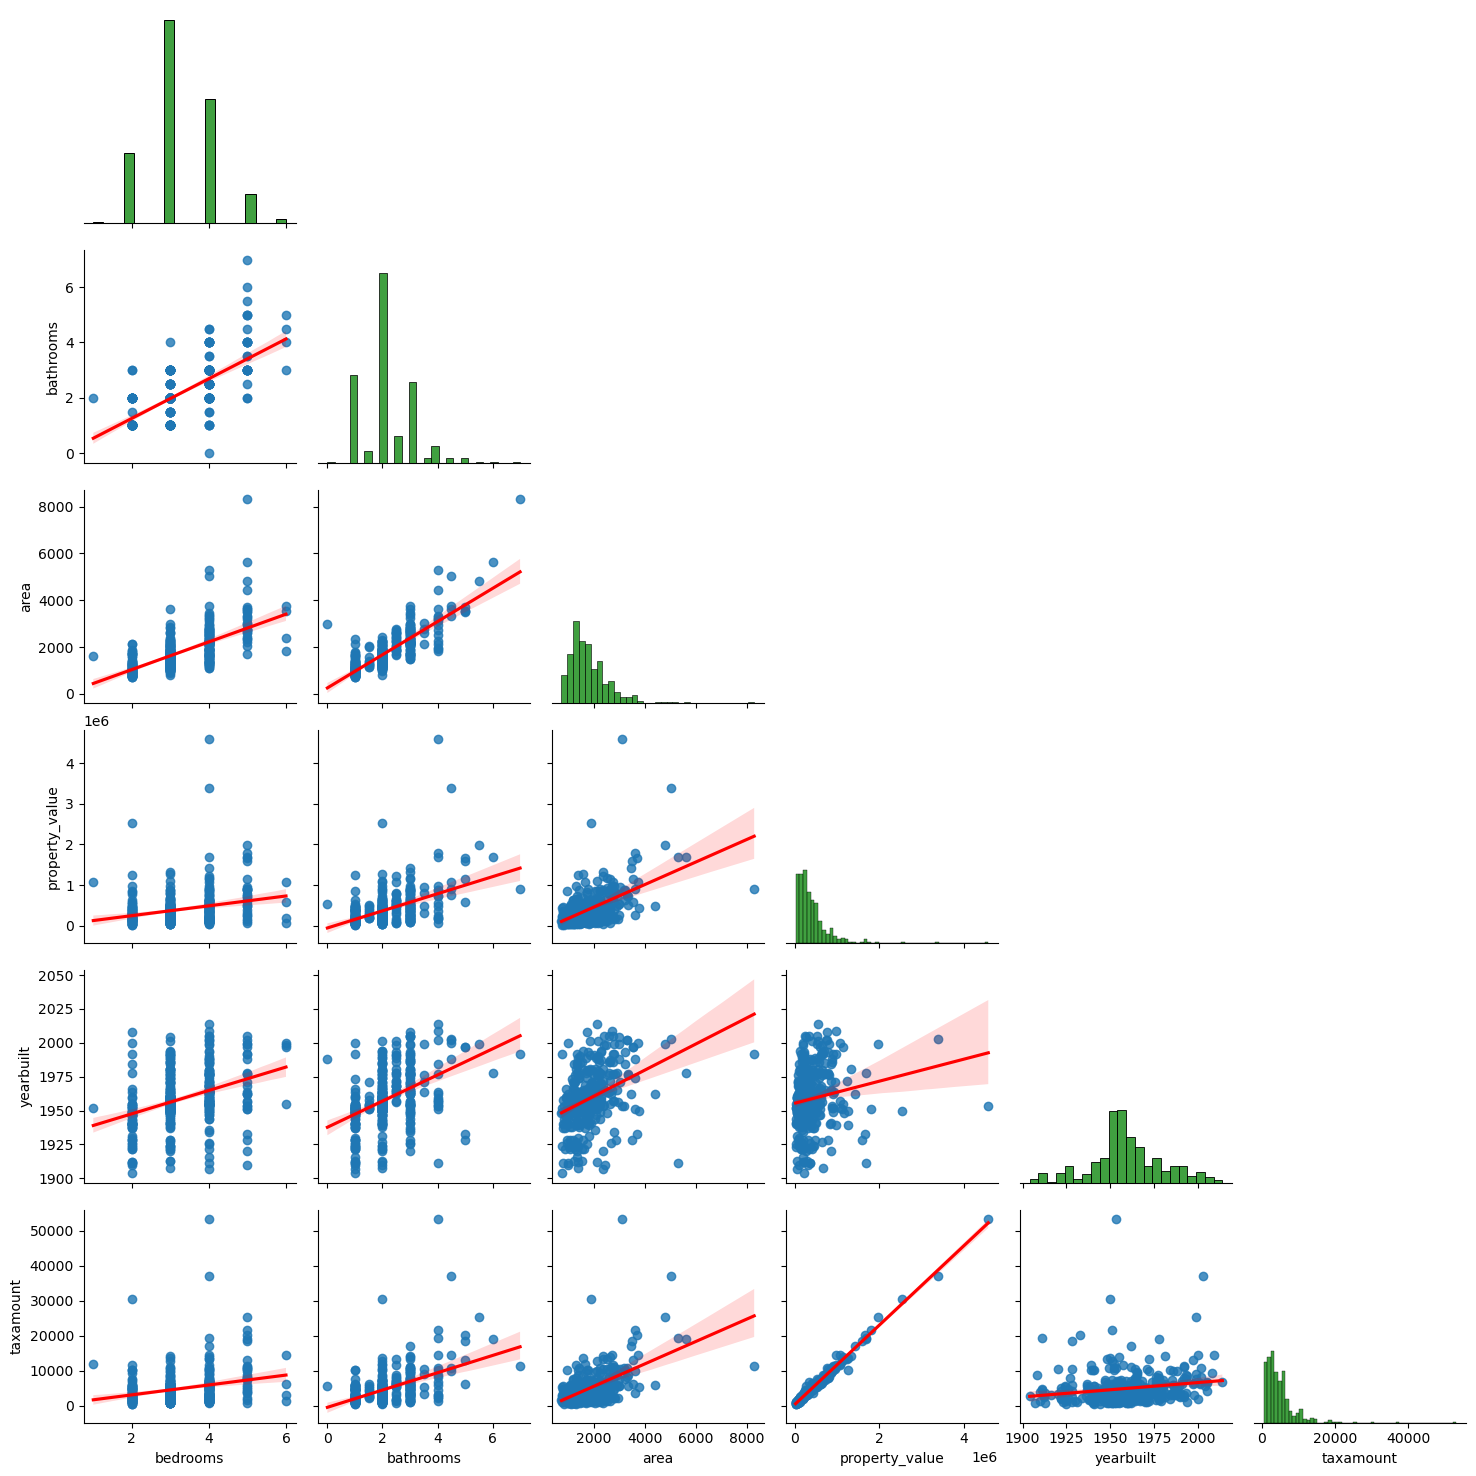

In [13]:
e.plot_variable_pairs(train.sample(400))

<div class='alert alert-block alert-success'>

# Q5. Come up with some initial hypotheses based on your goal of predicting property value.
    
</div>

<div class='alert alert-block alert-info'>

# HYPOTHESIS
    
</div>


<div class='alert alert-block alert-success'>

<h1>
HQ1) Is there a relationship between taxamount and property_value?

level of significance (alpha) =0.05
<h1>

 </div>

## visualize

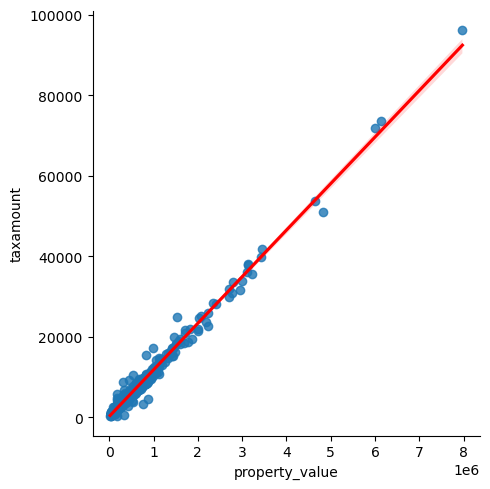

In [14]:
sns.lmplot(data=train.sample(1000), x='property_value', y='taxamount',line_kws={'color':'red'})
plt.show()

In [15]:
# for normality check
sha_stat, p_val = stats.shapiro(train.property_value)
sha_stat, p_val

(0.3887781500816345, 0.0)

Since p_value < alpha, so we reject Ho, so  property_value is not normally distributed.
so we have to use 'spearmann's R' test between two continuous variables 'propery_value' and 'taxamount'.

### Analyze

Ho: There is no linear correlation between taxamount and property_value

Ha: There is a linear correlation between taxamount and property_value

alpha=0.05

In [16]:
r,p=stats.spearmanr(train.property_value,train.taxamount)
r,p

(0.9785359758073235, 0.0)

Since p < alpha, so we reject Ho. 
This conclude there is a linear correlation between property_value and taxamount

<h1>
<div class='alert alert-block alert-success'>
HQ2) Does property value differ on the based of county?


Ho: There are significant differences among the groups.

Ha: There might not be significant differences among the groups.

alpha=0.05
<h1>
</div>

In [17]:
train.county.value_counts()

county
LA         855167
Orange     331090
Ventura     97884
Name: count, dtype: int64

In [18]:
la_prop=train[train.county=='LA'].property_value
orange_prop=train[train.county=='Orange'].property_value
ventura_prop=train[train.county=='Ventura'].property_value

Text(0.5, 1.0, 'Boxplot')

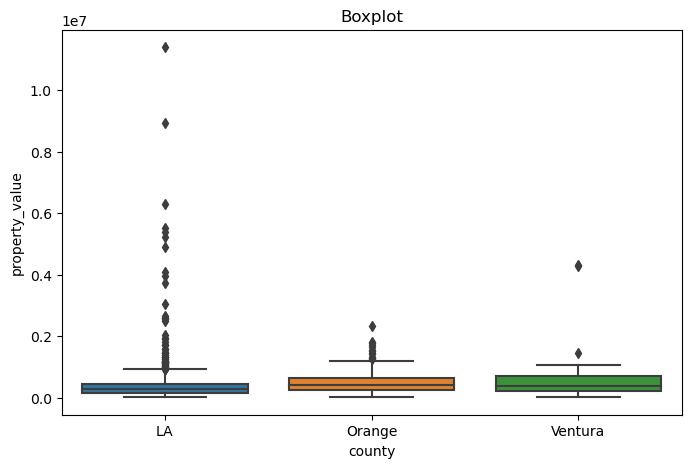

In [19]:
# visulize
plt.figure(figsize=(8,5))
# Plotting boxplot

sns.boxplot(x='county', y='property_value', data=train.sample(1000))
plt.title('Boxplot')


In [20]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(la_prop,orange_prop,ventura_prop)
f_stat,p_value


(1981.9072001847737, 0.0)

In [21]:
# Interpret results
alpha = 0.05  # Your chosen significance level
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject null hypothesis: There might not be significant differences among the groups.")

F-statistic: 1981.9072001847737
P-value: 0.0
Reject null hypothesis: There are significant differences among the groups.


<div class='alert alert-block alert-success'>

# HQ3) Does decadebuild affects the 'property_value' home value ?    

</div>

In [22]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA


In [23]:
train['yearbuilt'].value_counts().sort_index()

yearbuilt
1801       2
1807       1
1823       1
1833       1
1840       1
        ... 
2012    2052
2013    2820
2014    2821
2015    2120
2016      58
Name: count, Length: 149, dtype: int64

<Axes: xlabel='yearbuilt', ylabel='property_value'>

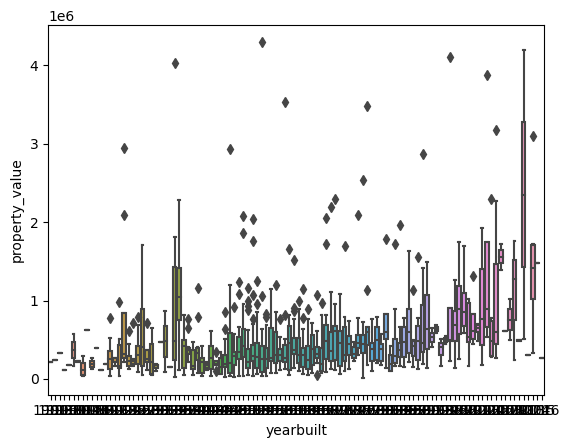

In [24]:
sns.boxplot(x='yearbuilt', y='property_value', data=train.sample(1000))

### Analze

comparing 'yearbuilt' to 'porperty_value' because we are going to bin tenure into 2xdecade, of which the highest year is 2016 and lowest year is 1801.so i will get 11 categorical decade built.

* Ho: There is no relationship between decade built and home value.

* Ha: There is relationship between decade built and home value.

* alpha=0.05


In [25]:
# Create bins for 'yearbuilt' in terms of 2xdecade
bins = [1800,1820,1840,1860
        ,1880,1900,1920,1940,1960,1980,2000,2020]  

# Create labels for the bins (representing years)
labels = ['1800s', '1820s', '1840s', '1860s', '1880s', '1900s', '1920s','1940s','1960s','1980s','2000s']

# Bin the 'yearbuilt' column
# eg:==> right == True (the default), then the bins=[1, 2, 3, 4] indicate (1,2], (2,3], (3,4]

train['decade_built'] = pd.cut(train['yearbuilt'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'tenure_years' column
print(train[['yearbuilt', 'decade_built']])

         yearbuilt decade_built
462820        2005        2000s
3880          1961        1960s
992263        1954        1940s
311722        1999        1980s
787985        1962        1960s
...            ...          ...
1966409       1963        1960s
1248263       1979        1960s
28211         1965        1960s
279547        2001        2000s
778196        1939        1920s

[1284141 rows x 2 columns]


In [26]:
train.head(4)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county,decade_built
462820,5,4.0,3011,710674,2005,7561.14,Ventura,2000s
3880,3,2.0,1682,603333,1961,7086.19,LA,1960s
992263,4,2.0,1433,82804,1954,1134.83,LA,1940s
311722,3,2.5,2001,355444,1999,4174.92,Ventura,1980s


In [27]:
train.decade_built.value_counts().sort_index()

decade_built
1800s         3
1820s         2
1840s         1
1860s        14
1880s      1483
1900s     31107
1920s    145271
1940s    494882
1960s    358318
1980s    174917
2000s     78143
Name: count, dtype: int64

In [33]:
train.decade_built.unique

<bound method Series.unique of 462820     2000s
3880       1960s
992263     1940s
311722     1980s
787985     1960s
           ...  
1966409    1960s
1248263    1960s
28211      1960s
279547     2000s
778196     1920s
Name: decade_built, Length: 1284141, dtype: category
Categories (11, object): ['1800s' < '1820s' < '1840s' < '1860s' ... '1940s' < '1960s' < '1980s' < '2000s']>

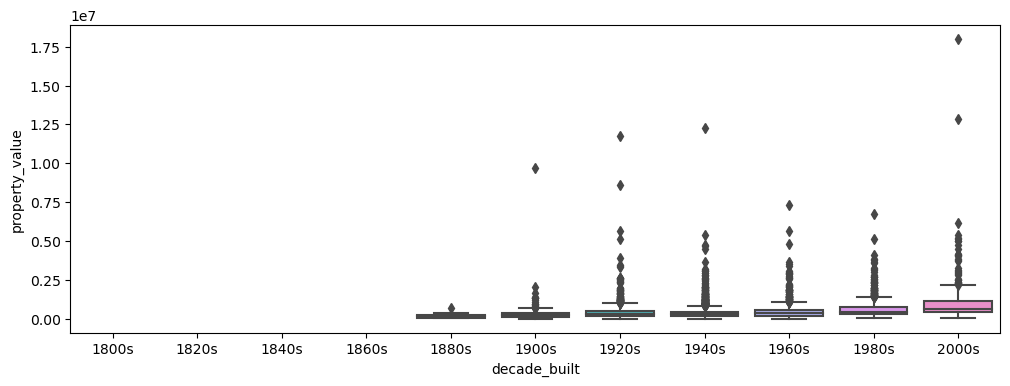

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(x='decade_built', y='property_value', data=train.sample(8000))
plt.show()

In [35]:
prop_1800s=train[train.decade_built=='1800s'].property_value
prop_1820s=train[train.decade_built=='1820s'].property_value
prop_1840s=train[train.decade_built=='1840s'].property_value
prop_1860s=train[train.decade_built=='1860s'].property_value
prop_1880s=train[train.decade_built=='1880s'].property_value
prop_1900s=train[train.decade_built=='1900s'].property_value
prop_1920s=train[train.decade_built=='1920s'].property_value
prop_1940s=train[train.decade_built=='1940s'].property_value
prop_1960s=train[train.decade_built=='1960s'].property_value
prop_1980s=train[train.decade_built=='1980s'].property_value
prop_2000s=train[train.decade_built=='2000s'].property_value

In [36]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(prop_1800s,
                                prop_1820s,
                                prop_1840s,
                                prop_1860s,
                                prop_1880s,
                                prop_1900s,
                                prop_1920s,
                                prop_1940s,
                                prop_1960s,
                                prop_1980s,
                                prop_2000s)
f_stat,p_value


(8242.556947398825, 0.0)

In [37]:
# Interpret results
alpha = 0.05  # Your chosen significance level
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject null hypothesis: There might not be significant differences among the groups.")

F-statistic: 8242.556947398825
P-value: 0.0
Reject null hypothesis: There are significant differences among the groups.


<div class='alert alert-block alert-success'>

# Q6. Visualize all combinations of variables in some way.
</div>

### univariate ( continuous variables & discrete variable distributions )

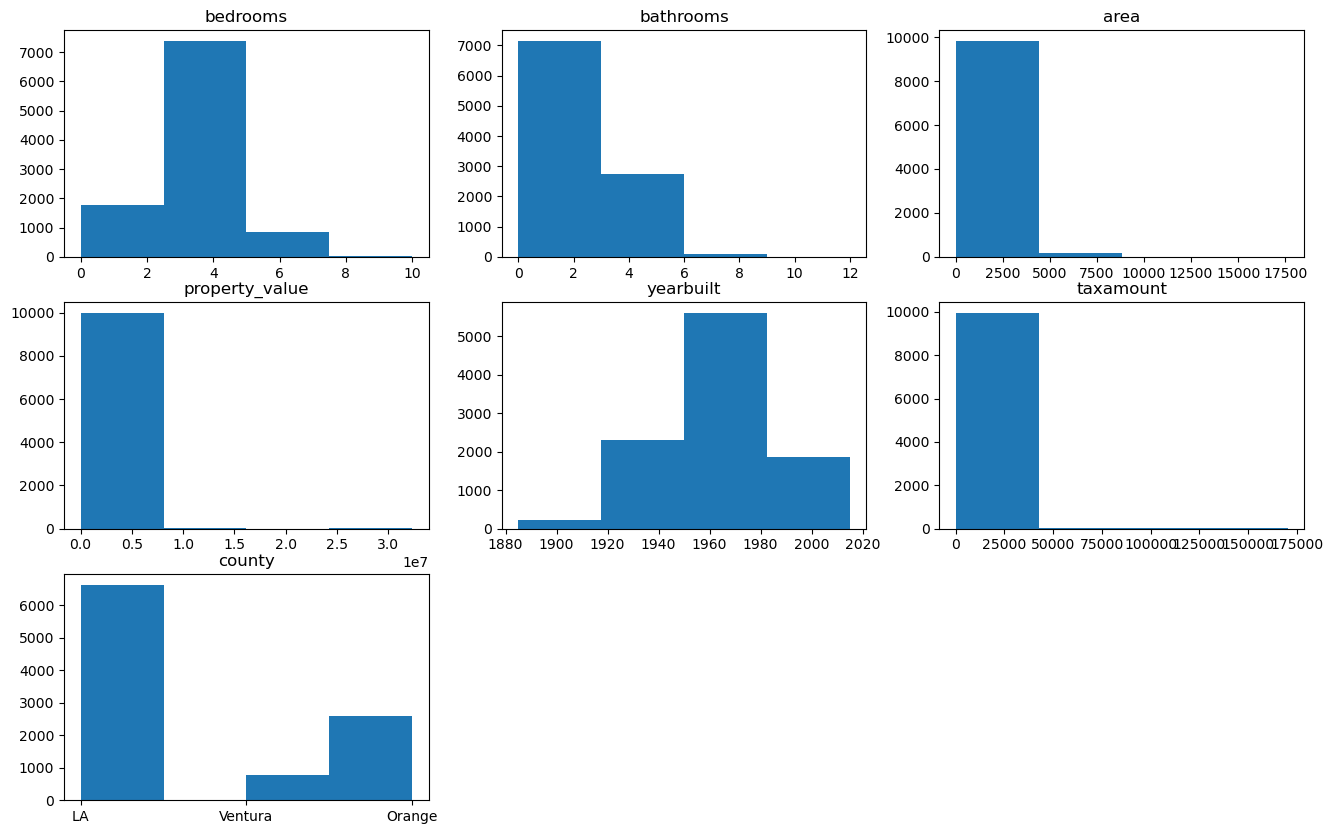

In [38]:

plt.figure(figsize=(16, 10))

# List of columns
cols = ['bedrooms','bathrooms','area','property_value','yearbuilt','taxamount','county']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot no.s should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(3,3, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train.sample(10000)[col].hist(bins=4)
    
    # Hide gridlines.
    plt.grid(False)

### all possible combination between continuous variables

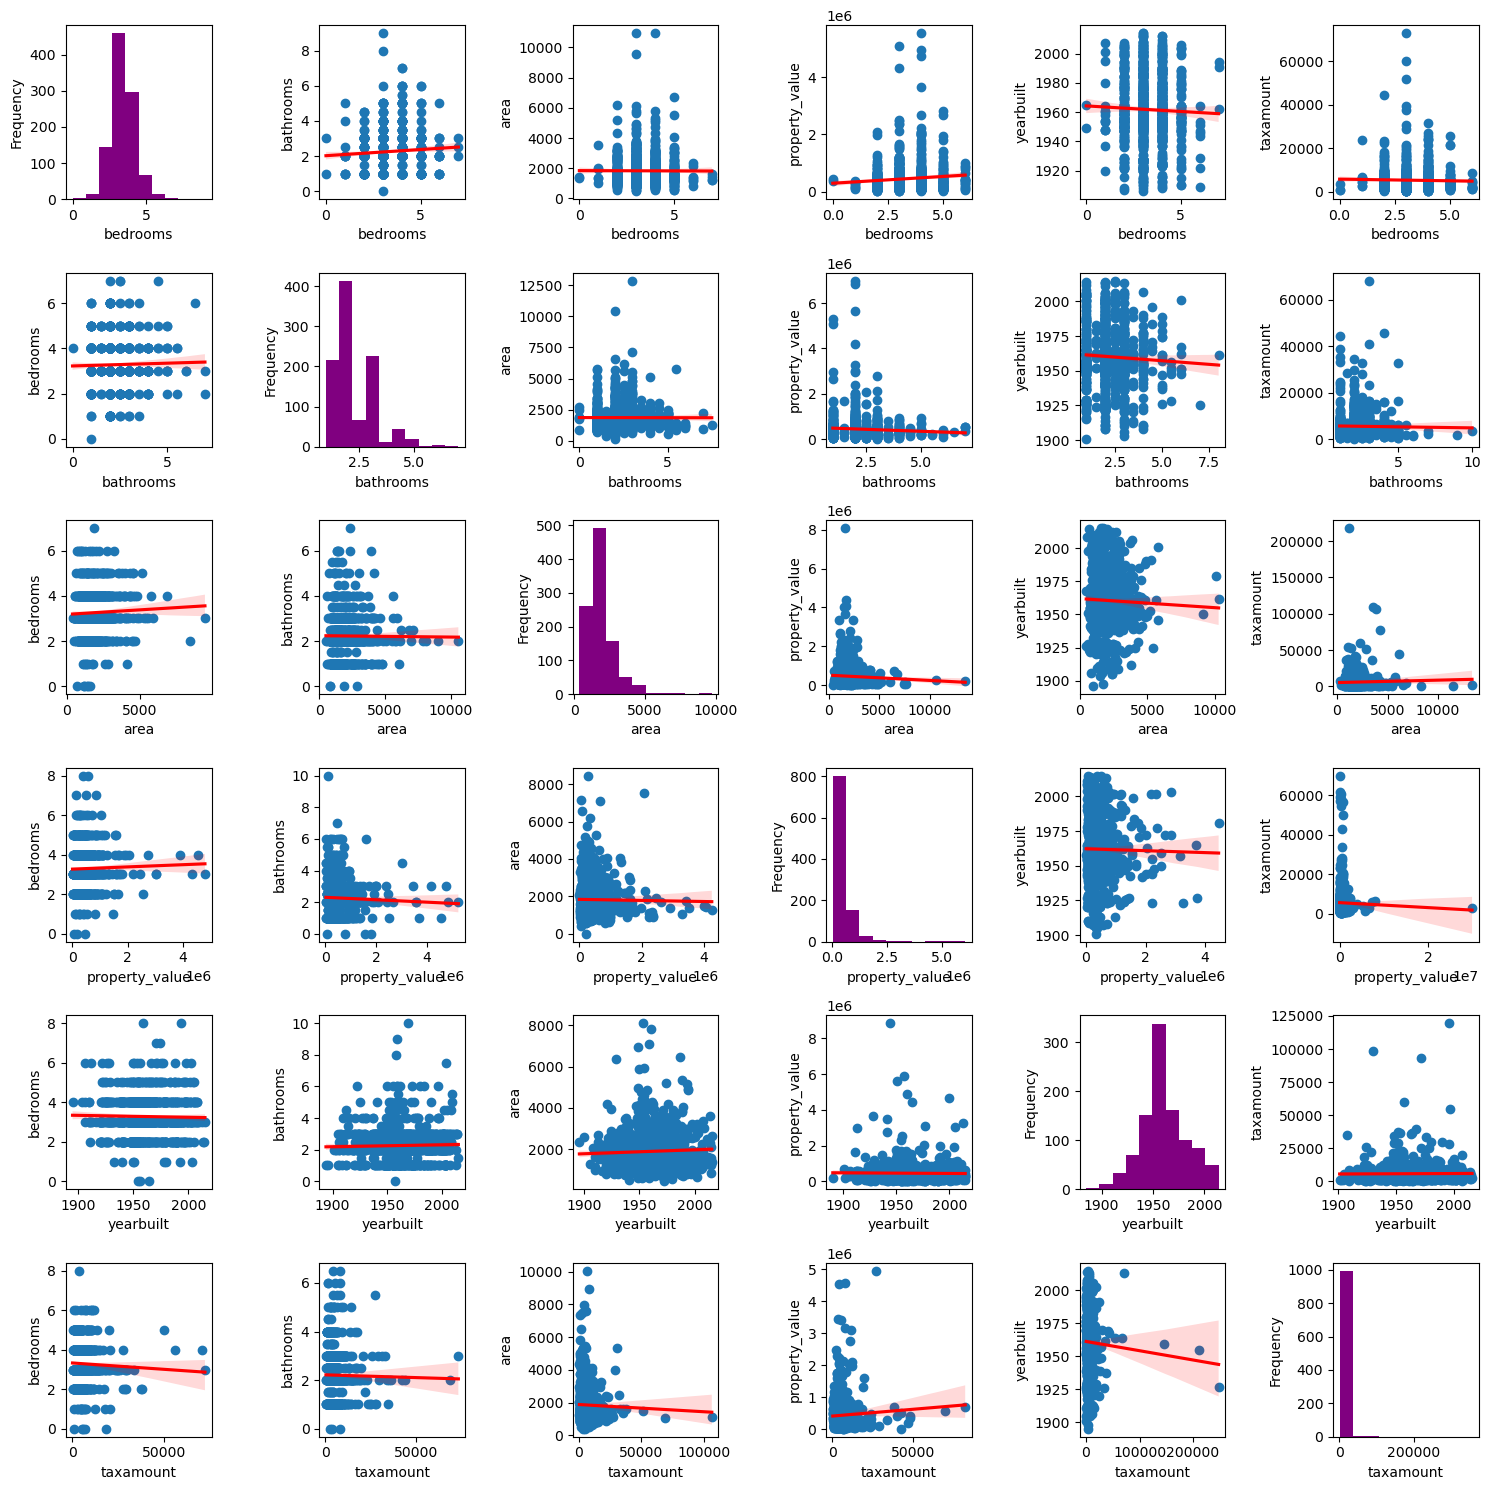

In [39]:
# Create a grid of pairwise plots (or jointplot with all possible combination)
fig, axes = plt.subplots(nrows=len(con_col), ncols=len(con_col), figsize=(15,15))

for i, x in enumerate(con_col):
    for j, y in enumerate(con_col):
        ax = axes[i, j]
        if x == y:
            # Plot histograms on the diagonal
            ax.hist(train.sample(1000)[x],color='purple', bins=10)  
            ax.set_xlabel(x)
            ax.set_ylabel('Frequency')
        else:
            x_data = train.sample(1000)[x]
            y_data = train.sample(1000)[y]
            
            # Plot scatterplots off-diagonal
            ax.scatter(x_data,y_data)  
            
            # Plot regression line using Seaborn's regplot
            sns.regplot(x=x_data,y=y_data, scatter=False, ax=ax, color='red')
            
            ax.set_xlabel(x)
            ax.set_ylabel(y)

plt.tight_layout()
plt.show();

<Axes: xlabel='county', ylabel='bedrooms'>

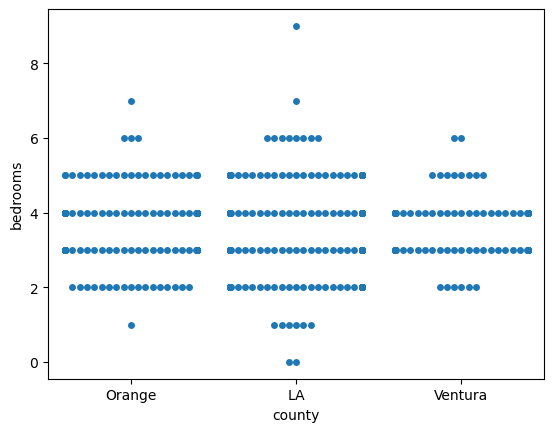

In [40]:
# single categorical VS single continuous variable 
sns.swarmplot(x='county', y='bedrooms', data=train.sample(1000))

> 8.Run the appropriate statistical tests where needed.

<h1>
<div class="alert alert-block alert-success">
Hypothesis test between 'property_value' VS 'continuous variables'
</div>
</h1>

In [41]:
for column in con_col:
    
    # Perform pearson's R test
    
    stat, p_value = stats.pearsonr(train['property_value'], train[column])  
    
    # Print the results
    print(f"pearson R test: {column} against property_value:")
    print(f"statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, 
              "and property_value.")
        
        print()
        print()
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between"
              , column, "and property_value.")
        
        print()
        print()

    



pearson R test: bedrooms against property_value:
statistic: 0.2556099903380723
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bedrooms and property_value.


pearson R test: bathrooms against property_value:
statistic: 0.4980292649457789
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bathrooms and property_value.


pearson R test: area against property_value:
statistic: 0.544842451334306
P-value: 0.0
Reject the null hypothesis. There is evidence of association between area and property_value.


pearson R test: property_value against property_value:
statistic: 1.0
P-value: 0.0
Reject the null hypothesis. There is evidence of association between property_value and property_value.


pearson R test: yearbuilt against property_value:
statistic: 0.18663078471000716
P-value: 0.0
Reject the null hypothesis. There is evidence of association between yearbuilt and property_value.


pearson R test: taxamount against property_valu

> 9. What independent variables are correlated with the dependent variable, home value?



In [45]:
zillow_corr=train.drop(columns={'county','decade_built'}).corr(method='pearson')
zillow_corr

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount
bedrooms,1.000000,0.642926,0.544520,0.255610,0.375685,0.256626
bathrooms,0.642926,1.000000,0.749380,0.498029,0.508268,0.498299
area,0.544520,0.749380,1.000000,0.544842,0.394494,0.543442
property_value,0.255610,0.498029,0.544842,1.000000,0.186631,0.991132
yearbuilt,0.375685,0.508268,0.394494,0.186631,1.000000,0.187916
taxamount,0.256626,0.498299,0.543442,0.991132,0.187916,1.000000


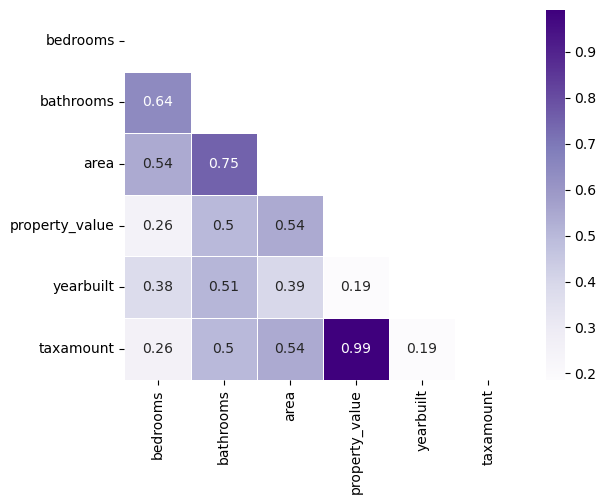

In [46]:
sns.heatmap(zillow_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.show()

> 10. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [47]:
indepen_vari=['bedrooms', 'bathrooms', 'yearbuilt', 'area']

In [48]:
for column in indepen_vari:
    
    
    # Perform pearson's R test
    stat, p_value = stats.pearsonr(train['property_value'], train[column])  
    
    # Print the results
    print(f"pearson R test: {column} against property_value:")
    print(f"statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, 
              "and property_value.")
        
        print()
        print()
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between"
              , column, "and property_value.")
        
        print()
        print()

    

pearson R test: bedrooms against property_value:
statistic: 0.2556099903380723
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bedrooms and property_value.


pearson R test: bathrooms against property_value:
statistic: 0.4980292649457789
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bathrooms and property_value.


pearson R test: yearbuilt against property_value:
statistic: 0.18663078471000716
P-value: 0.0
Reject the null hypothesis. There is evidence of association between yearbuilt and property_value.


pearson R test: area against property_value:
statistic: 0.544842451334306
P-value: 0.0
Reject the null hypothesis. There is evidence of association between area and property_value.




In [49]:
for column in indepen_vari:
    
    
    
    stat, p_value = stats.pearsonr(train['taxamount'], train[column])  # Perform pearson's R test
    
    # Print the results
    print(f"pearson R test: {column} against taxamount:")
    print(f"statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check if the p-value is less than the significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is evidence of association between", column, 
              "and taxamount.")
        
        print()
        print()
    else:
        print("Fail to reject the null hypothesis. There is not enough evidence of association between"
              , column, "and taxamount.")
        
        print()
        print()

    

pearson R test: bedrooms against taxamount:
statistic: 0.2566259762581232
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bedrooms and taxamount.


pearson R test: bathrooms against taxamount:
statistic: 0.49829929068861806
P-value: 0.0
Reject the null hypothesis. There is evidence of association between bathrooms and taxamount.


pearson R test: yearbuilt against taxamount:
statistic: 0.18791624460749343
P-value: 0.0
Reject the null hypothesis. There is evidence of association between yearbuilt and taxamount.


pearson R test: area against taxamount:
statistic: 0.5434423544584052
P-value: 0.0
Reject the null hypothesis. There is evidence of association between area and taxamount.




> 11. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

> 12. Explore your dataset with any other visualizations you think will be helpful.